#  서브 프로젝트1

## 주제: 웹 크롤링을 통한 나만의 맛집 정리

### 자주 방문하는 지역들로 정리
- 가게 이름, 위치, 카테고리, 평점, 리뷰 수
- 연신내, 경복궁, 안국, 종로, 홍대 

In [148]:
#필요 모듈
import requests
from bs4 import BeautifulSoup
from selenium import webdriver
from selenium.webdriver.chrome.service import Service
from webdriver_manager.chrome import ChromeDriverManager
driver = webdriver.Chrome(service=Service(ChromeDriverManager().install()))
from selenium.webdriver.common.by import By
import time
from selenium.webdriver.common.keys import Keys

In [149]:
#구글맵으로 진행하려 했지만 크롤링에 어려움이 있어 카카오맵으로 전환

#카카오맵 주소
driver.get('https://map.kakao.com/')

In [150]:
#검색창
search = driver.find_element(By.ID, 'search.keyword.query')
search.send_keys('연신내 맛집')
search.send_keys(Keys.ENTER)

In [153]:
#가게 리스트
restaurant_list = driver.find_elements(By.CSS_SELECTOR, '.placelist li')

In [155]:
len(restaurant_list) #잘 들어왔는지 개수 확인(한 페이지 당 15개)

15

In [160]:
#첫페이지 출력
for restaurant in restaurant_list:
    name = restaurant.find_element(By.CSS_SELECTOR, '.link_name').text.strip()
    category = restaurant.find_element(By.CSS_SELECTOR, '.subcategory').text.strip()
    location = restaurant.find_element(By.CSS_SELECTOR, 'p[data-id="address"]').text.strip()
    rating = restaurant.find_element(By.CSS_SELECTOR, 'div span .num[data-id="scoreNum"]').text.strip()
    review_num = restaurant.find_element(By.CSS_SELECTOR, 'em[data-id="numberofreview"]').text.strip()
    print(f'가게이름: {name}, 카테고리: {category}, 위치: {location},  평점: {rating}, 리뷰수: {review_num}')

가게이름: 원조두꺼비집불오징어, 카테고리: 해물,생선, 위치: 서울 은평구 연서로28길 5 1,2층,  평점: 4.3, 리뷰수: 206
가게이름: 구석집, 카테고리: 호프,요리주점, 위치: 서울 은평구 통일로83길 17-5 1층,  평점: 3.7, 리뷰수: 157
가게이름: 백년가게 만포면옥 본점, 카테고리: 한식, 위치: 서울 은평구 연서로 171 1, 2층,  평점: 3.3, 리뷰수: 98
가게이름: 골목집갈비살, 카테고리: 갈비, 위치: 서울 은평구 연서로27길 12-9 1층,  평점: 4.2, 리뷰수: 51
가게이름: 카페뤽상부르, 카테고리: 커피전문점, 위치: 서울 은평구 연서로25길 6-11 1, 2층,  평점: 3.8, 리뷰수: 100
가게이름: 접시고기, 카테고리: 육류,고기, 위치: 서울 은평구 연서로29길 22 1층,  평점: 4.1, 리뷰수: 88
가게이름: 휴식, 카테고리: 이탈리안, 위치: 서울 은평구 연서로26길 14 2층,  평점: 4.0, 리뷰수: 122
가게이름: YM커피프로젝트, 카테고리: 커피전문점, 위치: 서울 은평구 연서로29길 21-8 1층,  평점: 4.5, 리뷰수: 21
가게이름: 화포식당, 카테고리: 삼겹살, 위치: 서울 은평구 연서로29길 20-15 1층,  평점: 3.9, 리뷰수: 21
가게이름: 원조양평해장국 직영점, 카테고리: 해장국, 위치: 서울 은평구 연서로 203,  평점: 3.3, 리뷰수: 39
가게이름: 부엉이산장, 카테고리: 한식, 위치: 서울 은평구 연서로25길 6-18 1층,  평점: 4.2, 리뷰수: 155
가게이름: 쿠우쿠우 연신내점, 카테고리: 해산물뷔페, 위치: 서울 은평구 통일로 856 메트로타워 6층,  평점: 3.7, 리뷰수: 147
가게이름: 갈현동할머니떡볶이, 카테고리: 떡볶이, 위치: 서울 은평구 통일로87길 8-1,  평점: 3.3, 리뷰수: 38
가게이름: 목노집, 카테고리: 족발,보쌈, 위치: 서울 은평구 연서로28길 10,  평점: 3.7, 리뷰수: 51
가게이름: 파술

In [186]:
#'더보기 버튼' 클릭 -> 2페이지로 넘어감
more_btn = driver.find_element(By.CSS_SELECTOR, 'a[id="info.search.place.more"]')
more_btn.click() 
time.sleep(2)

In [162]:
#2페이지 크롤링
restaurant_list = driver.find_elements(By.CSS_SELECTOR, '.placelist li')
for restaurant in restaurant_list:
    name = restaurant.find_element(By.CSS_SELECTOR, '.link_name').text.strip()
    category = restaurant.find_element(By.CSS_SELECTOR, '.subcategory').text.strip()
    location = restaurant.find_element(By.CSS_SELECTOR, 'p[data-id="address"]').text.strip()
    rating = restaurant.find_element(By.CSS_SELECTOR, 'div span .num[data-id="scoreNum"]').text.strip()
    review_num = restaurant.find_element(By.CSS_SELECTOR, 'em[data-id="numberofreview"]').text.strip()
    print(f'가게이름: {name}, 카테고리: {category}, 위치: {location},  평점: {rating}, 리뷰수: {review_num}')

가게이름: 아웃닭 연신내점, 카테고리: 치킨, 위치: 서울 은평구 연서로29길 20-7 1층,  평점: 4.5, 리뷰수: 34
가게이름: 보들이족발, 카테고리: 족발,보쌈, 위치: 서울 은평구 연서로 230-10 보들이족발,  평점: 3.4, 리뷰수: 75
가게이름: 심야식당세이지, 카테고리: 일식, 위치: 서울 은평구 연서로27길 13-6,  평점: 3.4, 리뷰수: 98
가게이름: 유라쿠, 카테고리: 초밥,롤, 위치: 서울 은평구 연서로 214,  평점: 3.1, 리뷰수: 122
가게이름: 한판승부, 카테고리: 일본식주점, 위치: 서울 은평구 통일로83길 11-6 지층,  평점: 4.8, 리뷰수: 34
가게이름: 823m, 카테고리: 디저트카페, 위치: 서울 은평구 연서로29길 21-9 1층,  평점: 4.0, 리뷰수: 118
가게이름: 조개폭식 연신내점, 카테고리: 조개, 위치: 서울 은평구 연서로 208 1층,  평점: 4.5, 리뷰수: 32
가게이름: 미각, 카테고리: 샤브샤브, 위치: 서울 은평구 연서로29길 10-1 1층,  평점: 4.9, 리뷰수: 18
가게이름: 화로상회 갈현점, 카테고리: 육류,고기, 위치: 서울 은평구 연서로29길 34 1층,  평점: 3.5, 리뷰수: 27
가게이름: 싱싱연신내횟집, 카테고리: 회, 위치: 서울 은평구 연서로27길 17 1층,  평점: 2.9, 리뷰수: 56
가게이름: 성일식당, 카테고리: 갈비, 위치: 서울 은평구 갈현로 306-8,  평점: 4.6, 리뷰수: 116
가게이름: 마르, 카테고리: 삼겹살, 위치: 서울 은평구 연서로27길 16-13 1층,  평점: 3.9, 리뷰수: 68
가게이름: 수정불막창 연신내점, 카테고리: 곱창,막창, 위치: 서울 은평구 연서로29길 11-9,  평점: 3.4, 리뷰수: 61
가게이름: 삼대족발 연신내점, 카테고리: 족발,보쌈, 위치: 서울 은평구 연서로29길 14-18,  평점: 2.9, 리뷰수: 29
가게이름: 후통마라탕, 카테고리: 중식, 위치: 서울 은평구 연서

In [243]:
#2페이지까지! 크롤링
final_result = restaurant_crawling()

for next_page in range(2,6):
    
    #맨 밑으로 이동
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    #페이지 찾기
    pages = driver.find_elements(By.CSS_SELECTOR, 'a[id*="info.search.page.no"]')
    #다음 페이지 클릭
    for page in pages:
        if page.text == str(next_page):
            page.click()
    time.sleep(3)
    final_result.extend(restaurant_crawling())
            
#다음 버튼 클릭(5페이지씩 나뉨)
pages_plus = driver.find_element(By.CSS_SELECTOR, 'button[id*="info.search.page.next"]')
pages_plus.click()
time.sleep(3)

#다음 페이지 클릭
for next_page in range(6,11):

    #맨 밑으로 이동
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
    #페이지 찾기
    pages = driver.find_elements(By.CSS_SELECTOR, 'a[id*="info.search.page.no"]')
    for page in pages:
        if page.text == str(next_page):
            page.click()
    time.sleep(3)
    final_result.extend(restaurant_crawling())

In [180]:
len(final_result) #확인 -> 135개가 나와야 하는데 150개 출력 -> 한페이지가 중복 크롤링 되어, 위의 코드 수정

150

In [181]:
final_result

[{'가게이름': '아웃닭 연신내점',
  '카테고리': '치킨',
  '위치': '서울 은평구 연서로29길 20-7 1층',
  '평점': '4.5',
  '리뷰수': '34'},
 {'가게이름': '보들이족발',
  '카테고리': '족발,보쌈',
  '위치': '서울 은평구 연서로 230-10 보들이족발',
  '평점': '3.4',
  '리뷰수': '75'},
 {'가게이름': '심야식당세이지',
  '카테고리': '일식',
  '위치': '서울 은평구 연서로27길 13-6',
  '평점': '3.4',
  '리뷰수': '98'},
 {'가게이름': '유라쿠',
  '카테고리': '초밥,롤',
  '위치': '서울 은평구 연서로 214',
  '평점': '3.1',
  '리뷰수': '122'},
 {'가게이름': '한판승부',
  '카테고리': '일본식주점',
  '위치': '서울 은평구 통일로83길 11-6 지층',
  '평점': '4.8',
  '리뷰수': '34'},
 {'가게이름': '823m',
  '카테고리': '디저트카페',
  '위치': '서울 은평구 연서로29길 21-9 1층',
  '평점': '4.0',
  '리뷰수': '118'},
 {'가게이름': '조개폭식 연신내점',
  '카테고리': '조개',
  '위치': '서울 은평구 연서로 208 1층',
  '평점': '4.5',
  '리뷰수': '32'},
 {'가게이름': '미각',
  '카테고리': '샤브샤브',
  '위치': '서울 은평구 연서로29길 10-1 1층',
  '평점': '4.9',
  '리뷰수': '18'},
 {'가게이름': '화로상회 갈현점',
  '카테고리': '육류,고기',
  '위치': '서울 은평구 연서로29길 34 1층',
  '평점': '3.5',
  '리뷰수': '27'},
 {'가게이름': '싱싱연신내횟집',
  '카테고리': '회',
  '위치': '서울 은평구 연서로27길 17 1층',
  '평점': '2.9',
  '리뷰수': '56'},
 {

In [256]:
#크롤링 함수 생성
def restaurant_crawling():
    #result = []
    restaurant_list = driver.find_elements(By.CSS_SELECTOR, '.placelist li')
    for restaurant in restaurant_list:
        name = restaurant.find_element(By.CSS_SELECTOR, '.link_name').text.strip()
        category = restaurant.find_element(By.CSS_SELECTOR, '.subcategory').text.replace(',',' | ').strip()
        location = restaurant.find_element(By.CSS_SELECTOR, 'p[data-id="address"]').text.replace(',',' ').strip()
        rating = restaurant.find_element(By.CSS_SELECTOR, 'div span .num[data-id="scoreNum"]').text.strip()
        review_num = restaurant.find_element(By.CSS_SELECTOR, 'em[data-id="numberofreview"]').text.replace(',','').strip()
        
        #데이터 파일에 저장
        f = open('restaurant_crawling.csv', 'a')
        f.write(name+","+category+","+location+","+rating+","+review_num+"\n")
        f.close()
        
#         result.append({
#             '가게이름': name,
#             '카테고리': category,
#             '위치': location,
#             '평점': rating,
#             '리뷰수': review_num
#         })
    
    return None #result

In [261]:
#파일 생성
f = open('restaurant_crawling.csv', 'w')

#파일 헤더
f.write('가게이름,카테고리,위치,평점,리뷰수\n') #줄바꿈 꼭!
f.close()

In [262]:
#최종 코드


driver.get('https://map.kakao.com/')

#region_final_result = []

#검색
region_list = ['연신내 맛집','경복궁 맛집','안국 맛집','종로 맛집','홍대 맛집']
for region in region_list:
    search = driver.find_element(By.ID, 'search.keyword.query')
    search.clear()
    time.sleep(2)
    search.send_keys(region)
    search.send_keys(Keys.ENTER)
    time.sleep(2)
    
    #final_result = restaurant_crawling() #1페이지 크롤링
    restaurant_crawling()
    time.sleep(2)
    
    #맨 밑으로 이동
    driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
        
    more_btn = driver.find_element(By.CSS_SELECTOR, 'a[id="info.search.place.more"]')
    #more_btn_click()
    time.sleep(2)
    more_btn.send_keys(Keys.ENTER) #더보기 버튼 클릭 -> 2페이지로 넘어감
    time.sleep(2)
    
    #final_result.extend(restaurant_crawling()) #2페이지 크롤링
    restaurant_crawling()
    
    for next_page in range(3,6):

        #맨 밑으로 이동
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")

        #페이지 찾기
        pages = driver.find_elements(By.CSS_SELECTOR, 'a[id*="info.search.page.no"]')

        #다음 페이지 클릭
        for page in pages:
            if page.text == str(next_page):
                page.click()
        time.sleep(2)
        #final_result.extend(restaurant_crawling())
        restaurant_crawling()

    #다음 버튼 클릭
    pages_plus = driver.find_element(By.CSS_SELECTOR, 'button[id*="info.search.page.next"]')
    pages_plus.click()
    time.sleep(2)
    
    #final_result.extend(restaurant_crawling()) #6페이지 크롤링
    restaurant_crawling()
    
    #다음 페이지 클릭
    for next_page in range(7,11):

        #맨 밑으로 이동
        driver.execute_script("window.scrollTo(0,document.body.scrollHeight);")
        
        #페이지 찾기
        pages = driver.find_elements(By.CSS_SELECTOR, 'a[id*="info.search.page.no"]')
        for page in pages:
            if page.text == str(next_page):
                page.click()
        time.sleep(2)
        #final_result.extend(restaurant_crawling())
        restaurant_crawling()
    
    #region_final_result.append(final_result)
    

In [3]:
#!pip install pandas
import pandas as pd
import numpy as np

In [4]:
restaurant_df = pd.read_csv('restaurant_crawling.csv', encoding='cp949')
restaurant_df

,가게이름,카테고리,위치,평점,리뷰수
0,원조두꺼비집불오징어,해물 | 생선,서울 은평구 연서로28길 5 1 2층,4.3,206
1,구석집,호프 | 요리주점,서울 은평구 통일로83길 17-5 1층,3.7,157
2,백년가게 만포면옥 본점,한식,서울 은평구 연서로 171 1 2층,3.3,98
3,골목집갈비살,갈비,서울 은평구 연서로27길 12-9 1층,4.2,51
4,카페뤽상부르,커피전문점,서울 은평구 연서로25길 6-11 1 2층,3.8,100
...,...,...,...,...,...
745,고수포차,실내포장마차,서울 마포구 독막로 76-1 한주빌딩 1층 102호,4.6,104
746,돼지상회 홍대직영점,삼겹살,서울 마포구 홍익로5안길 28,NaN,5
747,가로수포차,실내포장마차,서울 마포구 잔다리로6길 34-13 1 2층,4.1,69
748,서교참치,참치회,서울 마포구 와우산로23길 35-3 2층,3.8,79


In [6]:
#카카오맵에 중복값이 존재하여 중복값 제거
restaurant_df.drop_duplicates(['가게이름'], inplace=True)
restaurant_df #중복값 100개

,가게이름,카테고리,위치,평점,리뷰수
0,원조두꺼비집불오징어,해물 | 생선,서울 은평구 연서로28길 5 1 2층,4.3,206
1,구석집,호프 | 요리주점,서울 은평구 통일로83길 17-5 1층,3.7,157
2,백년가게 만포면옥 본점,한식,서울 은평구 연서로 171 1 2층,3.3,98
3,골목집갈비살,갈비,서울 은평구 연서로27길 12-9 1층,4.2,51
4,카페뤽상부르,커피전문점,서울 은평구 연서로25길 6-11 1 2층,3.8,100
...,...,...,...,...,...
745,고수포차,실내포장마차,서울 마포구 독막로 76-1 한주빌딩 1층 102호,4.6,104
746,돼지상회 홍대직영점,삼겹살,서울 마포구 홍익로5안길 28,NaN,5
747,가로수포차,실내포장마차,서울 마포구 잔다리로6길 34-13 1 2층,4.1,69
748,서교참치,참치회,서울 마포구 와우산로23길 35-3 2층,3.8,79


### '한식'만 보고싶다면,

In [8]:
restaurant_df[restaurant_df['카테고리'] == '한식'].head(10)

,가게이름,카테고리,위치,평점,리뷰수
2,백년가게 만포면옥 본점,한식,서울 은평구 연서로 171 1 2층,3.3,98
10,부엉이산장,한식,서울 은평구 연서로25길 6-18 1층,4.2,155
79,연수식당,한식,서울 은평구 연서로27길 17-1,3.5,41
80,경주식당 연신내점,한식,서울 은평구 연서로27길 13-8,3.9,92
85,메밀마을,한식,서울 은평구 연서로26길 23-1,4.5,21
110,홍대칼국수와족발 연신내점,한식,서울 은평구 통일로 855-15 1층,3.3,37
123,도리연닭도리탕 연신내점,한식,서울 은평구 연서로27길 20 1층 102호,4.3,85
128,돌다리 김치찌개 연신내점,한식,서울 은평구 통일로 863-18,2.8,0
134,경복궁개성손만두 은평점,한식,서울 은평구 통일로82길 17 지하 2층,4.6,7
166,청수정,한식,서울 종로구 삼청로 91,3.3,72


### '카페'만 보고싶다면,

In [9]:
restaurant_df[restaurant_df['카테고리'] == '카페']

,가게이름,카테고리,위치,평점,리뷰수
33,플럽커피,카페,서울 은평구 연서로29길 7-11 3층,3.4,139
49,탐나도다,카페,서울 은평구 통일로83길 5-14,4.5,12
57,코피티암,카페,서울 은평구 연서로27길 7-1 1 2층,3.4,32
81,제이츠커피브루어스,카페,서울 은평구 연서로25길 20-3 1층,4.1,30
86,유토피아룸카페,카페,서울 은평구 연서로27길 16-8 2층,5.0,0
...,...,...,...,...,...
665,스탠스커피,카페,서울 마포구 와우산로11길 9 1층 101호,4.3,157
668,산리오러버스클럽,카페,서울 마포구 와우산로19길 18 가동 1 2층,4.0,352
684,카페 지금여기,카페,서울 마포구 양화로16길 30-5 3층,4.0,37
687,무신사테라스,카페,서울 마포구 양화로 188 AK&홍대 17층,3.4,391


### '마포구'만 보고싶다면!

In [10]:
restaurant_df[restaurant_df['위치'].str.contains('마포구')]

,가게이름,카테고리,위치,평점,리뷰수
600,진짜파스타,이탈리안,서울 마포구 와우산로 64 전원빌딩 2층 202호,4.6,67
601,감성타코 홍대점,멕시칸 | 브라질,서울 마포구 와우산로21길 20-11 2층,3.3,249
602,피오니 홍대점,카페,서울 마포구 독막로7길 51 1층,3.8,499
603,우와 홍대본점,철판요리,서울 마포구 와우산로21길 21-16 202호,3.4,137
604,테이스티버거,햄버거,서울 마포구 독막로 67-11 행운빌딩 1층,3.5,266
...,...,...,...,...,...
745,고수포차,실내포장마차,서울 마포구 독막로 76-1 한주빌딩 1층 102호,4.6,104
746,돼지상회 홍대직영점,삼겹살,서울 마포구 홍익로5안길 28,NaN,5
747,가로수포차,실내포장마차,서울 마포구 잔다리로6길 34-13 1 2층,4.1,69
748,서교참치,참치회,서울 마포구 와우산로23길 35-3 2층,3.8,79


### 평점이 4.7 이상인 것만 추출

In [12]:
restaurant_df[restaurant_df['평점'] >= 4.7].head(10)

,가게이름,카테고리,위치,평점,리뷰수
19,한판승부,일본식주점,서울 은평구 통일로83길 11-6 지층,4.8,34
22,미각,샤브샤브,서울 은평구 연서로29길 10-1 1층,4.9,18
31,다온상회,육류 | 고기,서울 은평구 통일로83길 14,4.7,60
59,봉화가마솥설렁탕,설렁탕,서울 은평구 연서로29길 22-17 1층,4.8,13
72,안동유진찜닭 연신내점,닭요리,서울 은평구 연서로29길 7-23,4.7,10
86,유토피아룸카페,카페,서울 은평구 연서로27길 16-8 2층,5.0,0
117,낭풍,찌개 | 전골,서울 은평구 연서로29길 11-2,5.0,11
119,무지개양꼬치 연신내점,양꼬치,서울 은평구 통일로83길 13 1층,5.0,14
141,치즈당,디저트카페,서울 은평구 통일로83길 5-4 1층,4.7,21
295,참,칵테일바,서울 종로구 자하문로7길 34,4.7,8


### 리뷰수가 1000개 이상인 것만 추출!

In [13]:
restaurant_df[restaurant_df['리뷰수'] >= 1000]

,가게이름,카테고리,위치,평점,리뷰수
165,노티드 안국,디저트카페,서울 종로구 북촌로 6-3 1층,3.3,1344
170,어니언 안국점,카페,서울 종로구 계동길 5,3.5,1441
178,다운타우너 안국,햄버거,서울 종로구 북촌로 6-4 1층,4.1,1081
270,런던베이글뮤지엄 안국점,제과 | 베이커리,서울 종로구 북촌로4길 20 연화빌딩 1층,3.2,2607
455,온천집 익선,샤브샤브,서울 종로구 돈화문로11나길 31-8 1층,3.4,1018


### 평점이 4.0 이상이고 리뷰수가 500개 이상인 것

In [14]:
restaurant_df[(restaurant_df['평점'] >= 4.0) & (restaurant_df['리뷰수'] >= 500)]

,가게이름,카테고리,위치,평점,리뷰수
168,안녕인사동,테마카페,서울 종로구 인사동길 49,4.1,511
175,오레노라멘 인사점,일본식라면,서울 종로구 율곡로 49-4,4.1,537
178,다운타우너 안국,햄버거,서울 종로구 북촌로 6-4 1층,4.1,1081
225,포비 광화문점,카페,서울 종로구 종로3길 17 광화문D타워 1층 21호,4.2,530
631,어반플랜트 합정,카페,서울 마포구 독막로4길 3 1~3층,4.2,690
639,오레노라멘 합정본점,일본식라면,서울 마포구 독막로6길 14,4.4,562


## 지도 시각화

In [22]:
#!pip install googlemaps
import googlemaps
df_list = pd.read_csv('restaurant_crawling.csv', encoding='cp949')

In [23]:
#구글맵 키
gmaps_key = ""
gmaps = googlemaps.Client(key = gmaps_key)

In [30]:
place_lat = [] #위도
place_lng = [] #경도

#우리나라 위도경도 범위(최대최소값)
max_lat = 39.0
min_lat = 33.0
max_lng = 132.0
min_lng = 125.0

for place in df_list['위치']:
    tmp = gmaps.geocode(place, language = 'ko') #지오코딩: 주소를 지리적 좌표로 변환
    
    #구글맵 검색이 될 경우
    if tmp:
        tmp_loc = tmp[0].get('geometry')
        tmp_lat = tmp_loc['location']['lat']
        tmp_lng = tmp_loc['location']['lng']
        
        #우리나라 위도경도 범위에 없을 경우
        if(tmp_lat > max_lat or tmp_lat < min_lat or tmp_lng > max_lng or tmp_lng < min_lng):
            place_lat.append('0')
            place_lng.append('0')
        
        #우리나라 위도경도 범위에 있을 경우    
        else:
            place_lat.append(tmp_lat)
            place_lng.append(tmp_lng)
            
    #구글맵 검색이 안 될 경우
    else:
        place_lat.append('0')
        place_lng.append('0')
            
print('위도경도 추가 완료')      
    

위도경도 추가 완료


In [35]:
#리스트들 데이터프레임으로 변환
df_list2 = pd.DataFrame(place_lat)
df_list3 = pd.DataFrame(place_lng)
df_list2

,0
0,37.618144
1,37.620481
2,37.614102
3,37.618382
4,37.617222
...,...
745,37.54694
746,37.55357
747,37.551911
748,37.554386


In [37]:
#열이름 변경
df_list2 = df_list2.rename(columns = {0:"위도"})
df_list3 = df_list3.rename(columns = {0:"경도"})
df_list2

,위도
0,37.618144
1,37.620481
2,37.614102
3,37.618382
4,37.617222
...,...
745,37.54694
746,37.55357
747,37.551911
748,37.554386


In [40]:
#세개의 데이터프레임 합쳐주기
df = pd.concat([df_list, df_list2, df_list3], axis = 1)
#카카오맵에 중복값이 존재하여 중복값 제거
df.drop_duplicates(['가게이름'], inplace=True)
df

,가게이름,카테고리,위치,평점,리뷰수,위도,경도
0,원조두꺼비집불오징어,해물 | 생선,서울 은평구 연서로28길 5 1 2층,4.3,206,37.618144,126.921116
1,구석집,호프 | 요리주점,서울 은평구 통일로83길 17-5 1층,3.7,157,37.620481,126.91788
2,백년가게 만포면옥 본점,한식,서울 은평구 연서로 171 1 2층,3.3,98,37.614102,126.917447
3,골목집갈비살,갈비,서울 은평구 연서로27길 12-9 1층,4.2,51,37.618382,126.918449
4,카페뤽상부르,커피전문점,서울 은평구 연서로25길 6-11 1 2층,3.8,100,37.617222,126.918147
...,...,...,...,...,...,...,...
745,고수포차,실내포장마차,서울 마포구 독막로 76-1 한주빌딩 1층 102호,4.6,104,37.54694,126.923122
746,돼지상회 홍대직영점,삼겹살,서울 마포구 홍익로5안길 28,NaN,5,37.55357,126.921209
747,가로수포차,실내포장마차,서울 마포구 잔다리로6길 34-13 1 2층,4.1,69,37.551911,126.921207
748,서교참치,참치회,서울 마포구 와우산로23길 35-3 2층,3.8,79,37.554386,126.923298


In [46]:
df.to_csv('restaurant_lat_lng.csv') #csv파일로 저장

In [1]:
#!pip install folium
import folium #파이썬 지도 시각화 라이브러리
import webbrowser
from folium.plugins import MarkerCluster

In [54]:
df = pd.read_csv('restaurant_lat_lng.csv', encoding='utf-8')
df

,Unnamed: 0,가게이름,카테고리,위치,평점,리뷰수,위도,경도
0,0,원조두꺼비집불오징어,해물 | 생선,서울 은평구 연서로28길 5 1 2층,4.3,206,37.618144,126.921116
1,1,구석집,호프 | 요리주점,서울 은평구 통일로83길 17-5 1층,3.7,157,37.620481,126.917880
2,2,백년가게 만포면옥 본점,한식,서울 은평구 연서로 171 1 2층,3.3,98,37.614102,126.917447
3,3,골목집갈비살,갈비,서울 은평구 연서로27길 12-9 1층,4.2,51,37.618382,126.918449
4,4,카페뤽상부르,커피전문점,서울 은평구 연서로25길 6-11 1 2층,3.8,100,37.617222,126.918147
...,...,...,...,...,...,...,...,...
645,745,고수포차,실내포장마차,서울 마포구 독막로 76-1 한주빌딩 1층 102호,4.6,104,37.546940,126.923122
646,746,돼지상회 홍대직영점,삼겹살,서울 마포구 홍익로5안길 28,NaN,5,37.553570,126.921209
647,747,가로수포차,실내포장마차,서울 마포구 잔다리로6길 34-13 1 2층,4.1,69,37.551911,126.921207
648,748,서교참치,참치회,서울 마포구 와우산로23길 35-3 2층,3.8,79,37.554386,126.923298


In [55]:
#불필요한 열 삭제
df.drop('Unnamed: 0', axis=1, inplace=True) #drop은 리턴 None
df

,가게이름,카테고리,위치,평점,리뷰수,위도,경도
0,원조두꺼비집불오징어,해물 | 생선,서울 은평구 연서로28길 5 1 2층,4.3,206,37.618144,126.921116
1,구석집,호프 | 요리주점,서울 은평구 통일로83길 17-5 1층,3.7,157,37.620481,126.917880
2,백년가게 만포면옥 본점,한식,서울 은평구 연서로 171 1 2층,3.3,98,37.614102,126.917447
3,골목집갈비살,갈비,서울 은평구 연서로27길 12-9 1층,4.2,51,37.618382,126.918449
4,카페뤽상부르,커피전문점,서울 은평구 연서로25길 6-11 1 2층,3.8,100,37.617222,126.918147
...,...,...,...,...,...,...,...
645,고수포차,실내포장마차,서울 마포구 독막로 76-1 한주빌딩 1층 102호,4.6,104,37.546940,126.923122
646,돼지상회 홍대직영점,삼겹살,서울 마포구 홍익로5안길 28,NaN,5,37.553570,126.921209
647,가로수포차,실내포장마차,서울 마포구 잔다리로6길 34-13 1 2층,4.1,69,37.551911,126.921207
648,서교참치,참치회,서울 마포구 와우산로23길 35-3 2층,3.8,79,37.554386,126.923298


In [80]:
#map 변수에 folium 사용하여 우리나라 위도경도 값 입력
#zoom_start = 확대 얼마나 시킬 것인지

map = folium.Map(location = [35.8797296, 128.4964884], zoom_start=7)
marker_cluster = MarkerCluster().add_to(map) #맵에 하나씩 추가

for index, a in df.iterrows(): #iterrows: csv파일 한줄씩 읽기
    if float(a['평점']) >= 4: #평점 4점 이상 빨간색
        score_color = 'red'
    elif float(a['평점']) >= 3: #평점 3점 이상 주황색
        score_color = 'orange'
    else:
        score_color = 'lightgreen' #그 미만 연두색
    
    print_popup = '<h5><strong>'+str(a["가게이름"])+'</strong></h5>'+' 카테고리 : '+ str(a["카테고리"])+' <br> '+' 평점 : '+ str(a["평점"])+' <br> 리뷰수 : '+str(a["리뷰수"])+ '<br> 주소 : '+str(a["위치"])
    folium.Marker(location = [a['위도'], a['경도']],
                 popup = folium.Popup(print_popup, max_width=300, min_width=300), #popup: 세부내용
                 icon = folium.Icon(color=score_color)).add_to(marker_cluster) #marker의 색상 및 스타일

In [81]:
map

In [73]:
map.save('restaurant_map.html') #맵을 파일로 저장

In [2]:
webbrowser.open('restaurant_map.html') #실행시 브라우저로 띄어줌

True

## 데이터베이스 활용

In [14]:
#이미지 삽입을 위함
#!pip install IPython

In [ ]:
#데이터베이스 활용 위해 pymysql 사용
import pymysql
connection = pymysql.connect(host="heena-db.cj3vpmozuotg.ap-northeast-2.rds.amazonaws.com",
port=3306,
user="root",
password="12569432!!!**",
database="subproject1",
charset="utf8mb4")

In [ ]:
#크롤링 한 파일 불러오기
import pandas as pd
restaurant_df = pd.read_csv('restaurant_crawling.csv', encoding='cp949')
restaurant_df = restaurant_df.fillna(0) #NAN값 0으로 만들어주기 #그렇지 않으면 에러 뜸
restaurant_df.head(5)

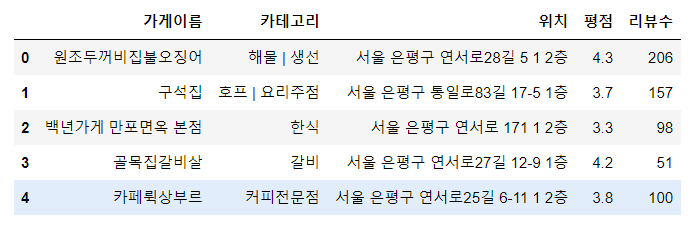

In [15]:
from IPython.display import Image
Image('images/1.png')

In [ ]:
#데이터베이스 테이블에 값 한번에 넣어주기
with connection.cursor() as cursor:
    sql = "INSERT INTO `Restaurants`(`Name`, `Category`, `Address`, `Rating`, `Review_num`) VALUES(%s, %s, %s, %s, %s)"
    mylist=[]
    
    for index, row in restaurant_df.iterrows(): #csv파일 내용 한 줄씩 가져옴
        mylist.append(tuple((row[0], row[1], row[2], float(row[3]), int(row[4]))))
    
    cursor.executemany(sql, mylist)
    
    connection.commit() 

In [ ]:
#평점이 4.9 이상인 것만 추출
#distinct 사용하여 중복값 제거
with connection.cursor() as cursor:
    sql = "SELECT DISTINCT * FROM `Restaurants` WHERE `Rating` >= %s"
    cursor.execute(sql, (float(4.9)))
    result = cursor.fetchall()
    print(result)

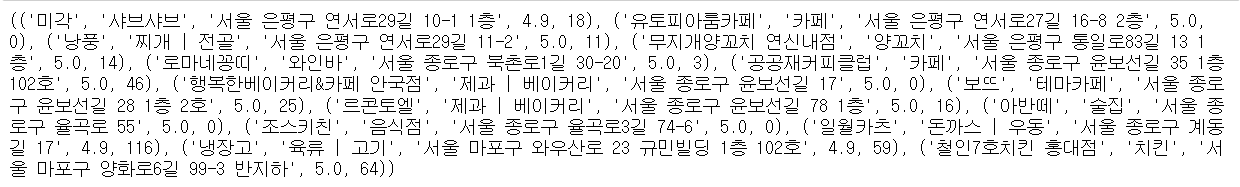

In [16]:
Image('images/2.png')

In [ ]:
#카페만 추출
#distinct 사용하여 중복값 제거
with connection.cursor() as cursor:
    sql = "SELECT DISTINCT * FROM `Restaurants` WHERE `Category` = %s"
    cursor.execute(sql, ('카페'))
    result = cursor.fetchall()
    result = result[:5] #일단 5개만
    print(result)

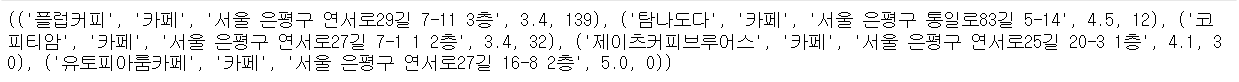

In [17]:
Image('images/3.png')

In [ ]:
#종로구만 추출
#distinct 사용하여 중복값 제거
with connection.cursor() as cursor:
    sql = "SELECT DISTINCT * FROM `Restaurants` WHERE `Address` LIKE '%종로구%'"
    cursor.execute(sql)
    result = cursor.fetchall()
    result = result[:5] #일단 5개만
    print(result)

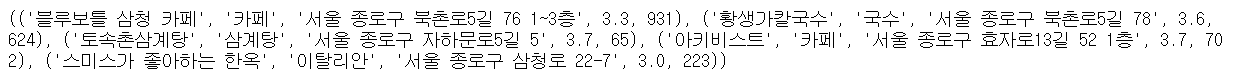

In [18]:
Image('images/4.png')

In [ ]:
#평점이 4.0 이상이고 리뷰수가 500개 이상인 것만 추출
#distinct 사용하여 중복값 제거
with connection.cursor() as cursor:
    sql = "SELECT DISTINCT * FROM `Restaurants` WHERE `Rating` >= 4.0 AND `Review_num` >= 500"
    cursor.execute(sql)
    result = cursor.fetchall()
    result = result[:5] #일단 5개만
    print(result)

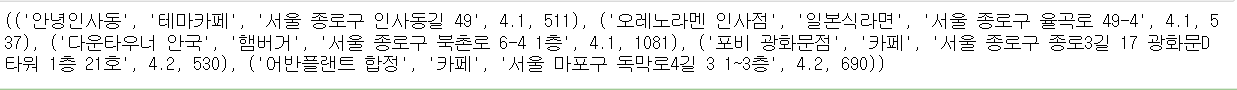

In [19]:
Image('images/5.png')